# EDA on Employee Attrition

## Aim: 
- To understand the concepts of business intelligence insights, by analysing the employee resignation behaviour.
- Data cleaning and EDA through python and identifying the KBRs and KPIs for this specific business problem.
	
## Business Problem: 
- The key to success in any organization is attracting and retaining top talent. As an HR analyst one of the key task is to determine which factors keep employees at the company and which prompt others to leave. Given in the data is a set of data points on the employees who are either currently working within the company or have resigned. The objective is to identify and improve these factors to prevent loss of good people.
- Our goal is to provide a complete analysis about all the factors that has impact on employee’s resignation patterns, the current insights of the organisation and its employee demographics.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
employeeDF = pd.read_csv('D:/Board Infinity/Projects/Final Projects BI/Employee Resignations/employee_attrition.csv')
employeeDF.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


## Data Exploration

In [3]:
employeeDF.shape

(1029, 35)

In [4]:
employeeDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,893.0,37.930571,9.395978,18.0,31.00,37.0,44.0,60.0
DailyRate,1002.0,800.528942,408.109828,102.0,458.25,801.5,1162.0,1496.0
DistanceFromHome,934.0,9.930407,8.421791,1.0,2.00,8.0,16.0,29.0
Education,1029.0,2.892128,1.053541,1.0,2.00,3.0,4.0,5.0
EmployeeCount,1029.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
EmployeeNumber,1029.0,1024.367347,606.301635,1.0,496.00,1019.0,1553.0,2068.0
EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.00,3.0,4.0,4.0
HourlyRate,1029.0,66.680272,20.474094,30.0,48.00,67.0,84.0,100.0
JobInvolvement,1029.0,2.713314,0.710146,1.0,2.00,3.0,3.0,4.0
JobLevel,1029.0,2.043732,1.118918,1.0,1.00,2.0,3.0,5.0


In [6]:
employeeDF['MonthlyIncome'].median()

4735.0

In [5]:
employeeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1029 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [6]:
employeeDF.isnull().sum().sort_values(ascending=False)

Age                         136
DistanceFromHome             95
DailyRate                    27
MaritalStatus                 5
Department                    0
NumCompaniesWorked            0
YearsSinceLastPromotion       0
YearsInCurrentRole            0
YearsAtCompany                0
WorkLifeBalance               0
TrainingTimesLastYear         0
TotalWorkingYears             0
StockOptionLevel              0
StandardHours                 0
RelationshipSatisfaction      0
PerformanceRating             0
PercentSalaryHike             0
OverTime                      0
Over18                        0
MonthlyRate                   0
BusinessTravel                0
MonthlyIncome                 0
Attrition                     0
JobSatisfaction               0
JobRole                       0
JobLevel                      0
JobInvolvement                0
HourlyRate                    0
Gender                        0
EnvironmentSatisfaction       0
EmployeeNumber                0
Employee

## Missing Imputations

In [7]:
employeeDF['Age'].fillna(employeeDF['Age'].mean(),inplace=True)

In [8]:
employeeDF['DailyRate'].fillna(employeeDF['DailyRate'].mean(),inplace=True)

In [9]:
employeeDF['DistanceFromHome'].fillna(employeeDF['DistanceFromHome'].mode()[0],inplace=True)

In [10]:
employeeDF['MaritalStatus'].fillna(employeeDF['MaritalStatus'].mode()[0],inplace=True)

In [11]:
employeeDF[['Age','DailyRate','DistanceFromHome']]

,Age,DailyRate,DistanceFromHome
0,50.000000,1126.0,1.0
1,36.000000,216.0,6.0
2,21.000000,337.0,7.0
3,50.000000,1246.0,1.0
4,52.000000,994.0,7.0
...,...,...,...
1024,37.930571,750.0,28.0
1025,41.000000,447.0,1.0
1026,22.000000,1256.0,1.0
1027,29.000000,1378.0,13.0


In [12]:
employeeDF.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          17
YearsInCurrentRole            19
DistanceFromHome              27
YearsAtCompany                32
TotalWorkingYears             40
Age                           40
HourlyRate

In [13]:
employeeDF = employeeDF.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18','StockOptionLevel'],axis=1)

In [14]:
employeeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1029 non-null   float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1029 non-null   object 
 3   DailyRate                 1029 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          1029 non-null   float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EnvironmentSatisfaction   1029 non-null   int64  
 9   Gender                    1029 non-null   object 
 10  HourlyRate                1029 non-null   int64  
 11  JobInvolvement            1029 non-null   int64  
 12  JobLevel                  1029 non-null   int64  
 13  JobRole                   1029 non-null   object 
 14  JobSatis

In [15]:
employeeDF.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,4,Male,...,22,4,3,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,2,Male,...,20,4,4,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,2,Male,...,13,3,2,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,1.0,3,Medical,1,Male,...,11,3,3,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,2,Male,...,19,3,4,18,4,3,8,6,4,0


<AxesSubplot:ylabel='Attrition'>

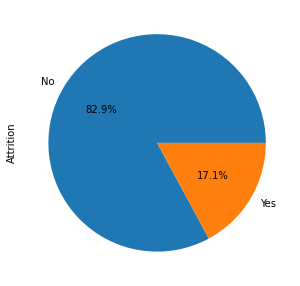

In [16]:
employeeDF.groupby('Attrition')['Attrition'].agg('count').plot(kind='pie',figsize = (5,5),autopct = '%1.1f%%')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

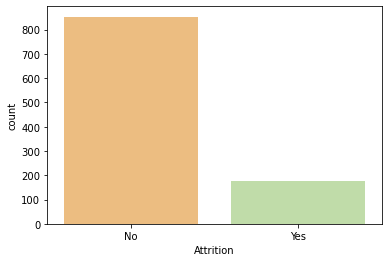

In [17]:
sns.countplot(data=employeeDF,x='Attrition',palette='Spectral')

In [18]:
employeeDF['Attrition_num'] = np.where(employeeDF['Attrition']=='Yes',True,False)

In [19]:
employeeDF[['Attrition_num']]

,Attrition_num
0,False
1,False
2,True
3,False
4,False
...,...
1024,False
1025,False
1026,True
1027,False


In [20]:
employeeDF.corrwith(employeeDF['Attrition_num'])

Age                        -0.160176
DailyRate                  -0.033794
DistanceFromHome            0.065660
Education                  -0.022094
EnvironmentSatisfaction    -0.082964
HourlyRate                 -0.007533
JobInvolvement             -0.129238
JobLevel                   -0.181610
JobSatisfaction            -0.102101
MonthlyIncome              -0.171551
MonthlyRate                 0.002960
NumCompaniesWorked          0.061832
PercentSalaryHike          -0.011157
PerformanceRating          -0.021510
RelationshipSatisfaction   -0.036987
TotalWorkingYears          -0.199323
TrainingTimesLastYear      -0.051681
WorkLifeBalance            -0.054439
YearsAtCompany             -0.154422
YearsInCurrentRole         -0.188421
YearsSinceLastPromotion    -0.050700
YearsWithCurrManager       -0.160552
Attrition_num               1.000000
dtype: float64

In [21]:
employeeDF.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,4,Male,...,4,3,32,1,2,5,4,1,3,False
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,2,Male,...,4,4,7,0,3,3,2,0,1,False
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,2,Male,...,3,2,1,3,3,1,0,1,0,True
3,50.0,No,Travel_Frequently,1246.0,Human Resources,1.0,3,Medical,1,Male,...,3,3,32,2,3,32,5,10,7,False
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,2,Male,...,3,4,18,4,3,8,6,4,0,False


<AxesSubplot:xlabel='Gender', ylabel='count'>

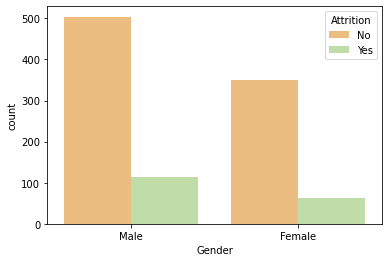

In [22]:
sns.countplot(data=employeeDF,x='Gender',hue='Attrition',palette='Spectral')

In [23]:
satisfaction_cols = ['JobSatisfaction','EnvironmentSatisfaction','JobInvolvement','RelationshipSatisfaction',
                    'PerformanceRating','WorkLifeBalance']

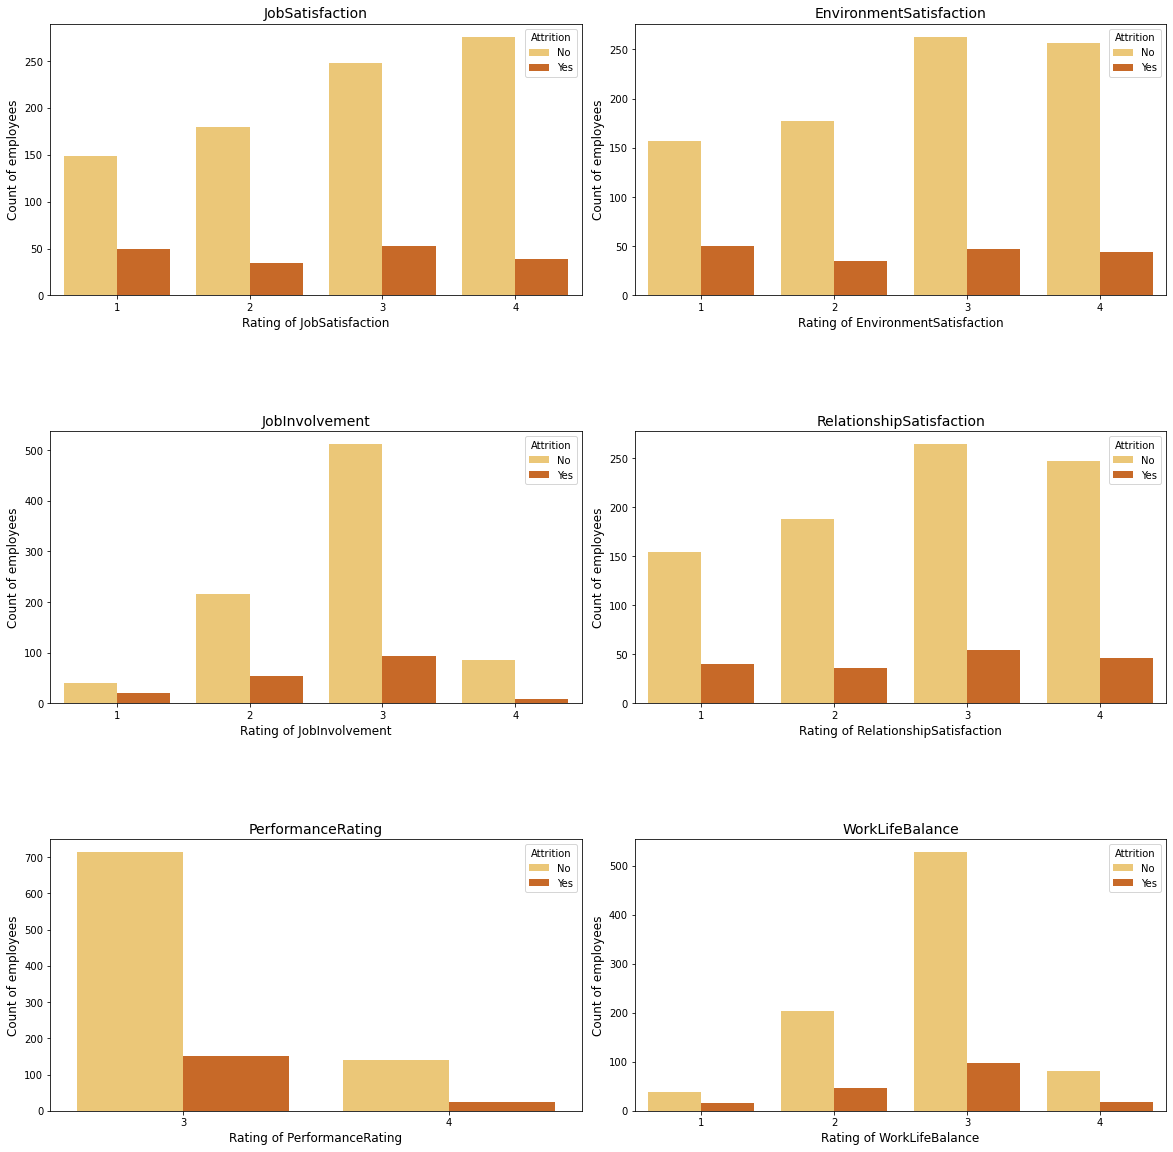

In [24]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

for i,j in enumerate(satisfaction_cols):
    plt.subplot(3,2,i+1)
    chart = sns.countplot(data= employeeDF[satisfaction_cols+['Attrition']],x=j,hue='Attrition',palette='YlOrBr')
    chart.axes.set_title(j,fontsize=14)
    chart.set_xlabel("Rating of"+' '+j,fontsize=12)
    chart.set_ylabel("Count of employees",fontsize=12)
    chart.tick_params(labelsize=10)

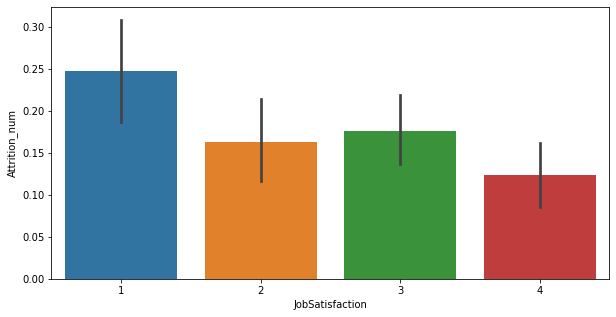

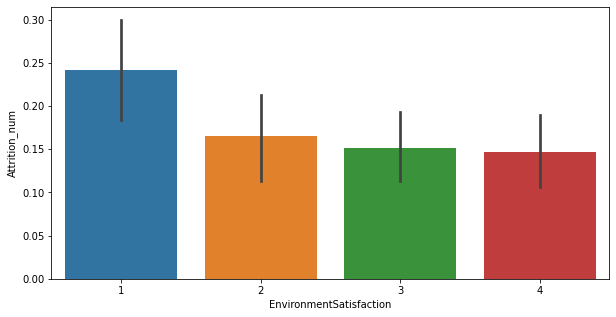

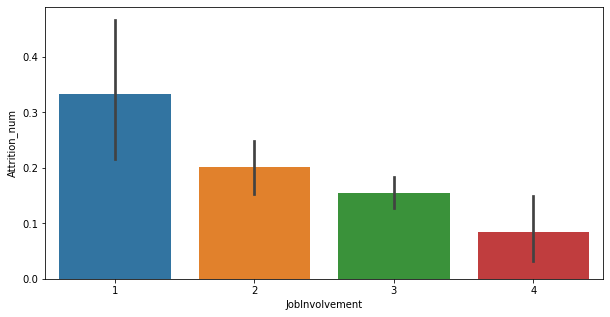

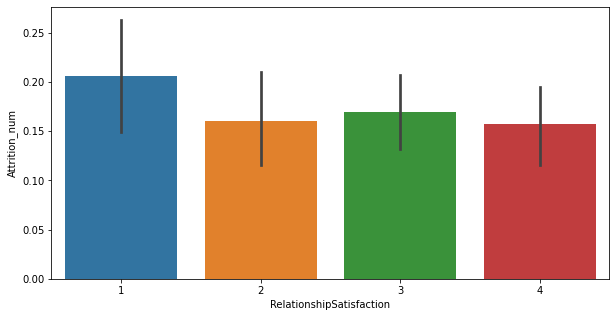

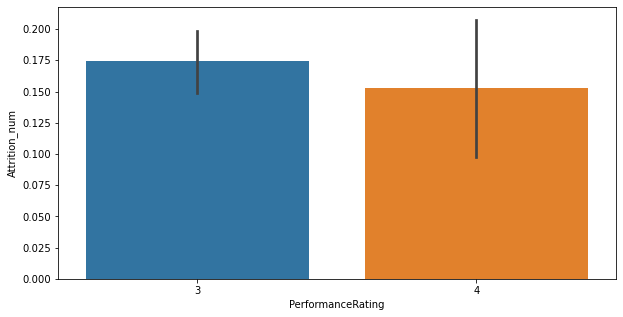

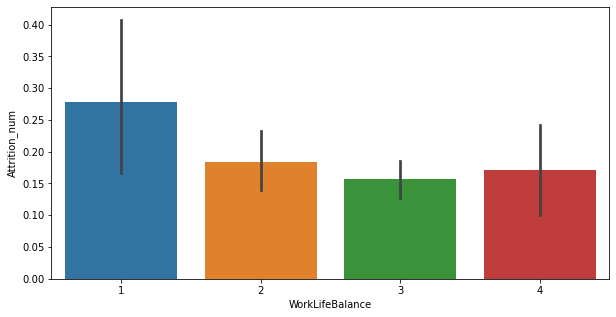

In [25]:
for i in satisfaction_cols:
    plt.figure(figsize=(10,5))
    sns.barplot(x=i,y='Attrition_num',data=employeeDF)

### Insights:

#### Job Satisfactions:
- Maximum of the employees tend to have a higher level of job satisfaction.

#### Environment Satisfaction:
- Maximum number of employees have a great environment satisfaction.

#### Job Involvement:
- Around 75-80% employees were moderately involved in there job, very few were highly involved.

#### Relationship Sastisfaction:
- About 60% of the employess were satisfied in this aspect.

#### Performance Rating:
- Very few(Around 20%) employees only were high rated in the employee rating.

#### Work-Life balance:
- More than 70% employees were havinf a good work life balance.


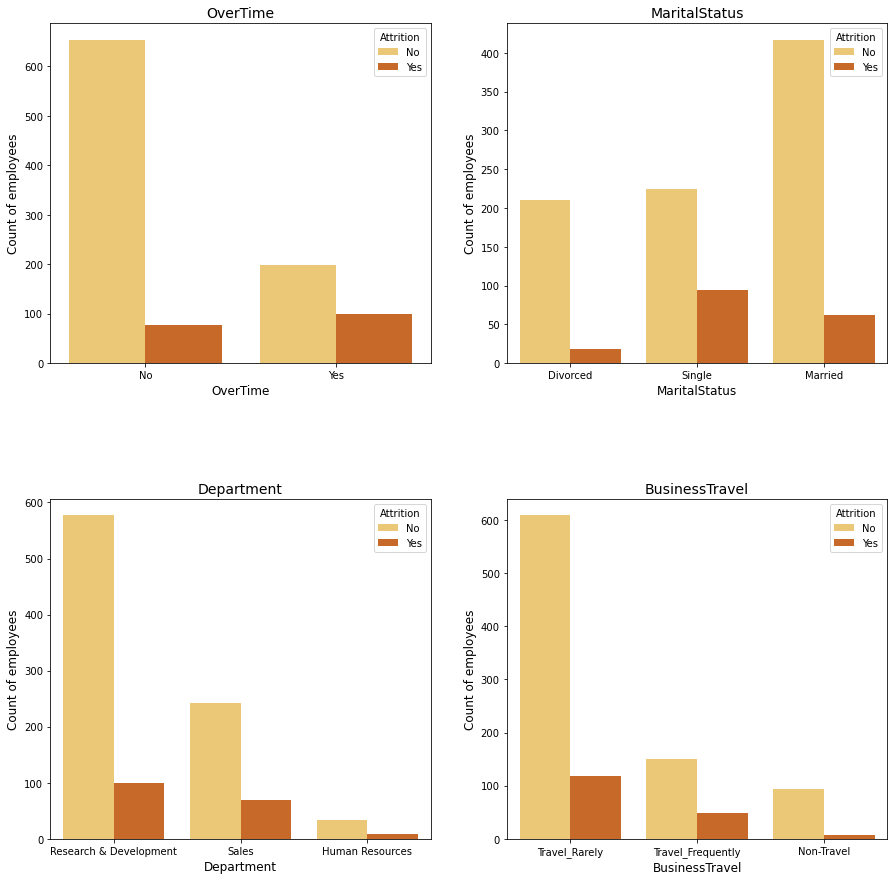

In [26]:
feat=['OverTime','MaritalStatus','Department','BusinessTravel']
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i,j in enumerate(feat):
    plt.subplot(2,2,i+1)
    chart = sns.countplot(data= employeeDF[feat+['Attrition']],x=j,hue='Attrition',palette='YlOrBr')
    chart.axes.set_title(j,fontsize=14)
    chart.set_xlabel(j,fontsize=12)
    chart.set_ylabel("Count of employees",fontsize=12)
    chart.tick_params(labelsize=10)

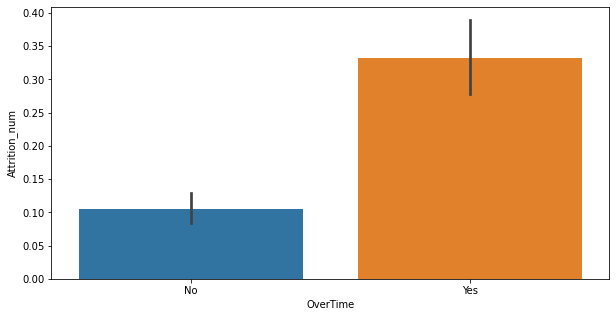

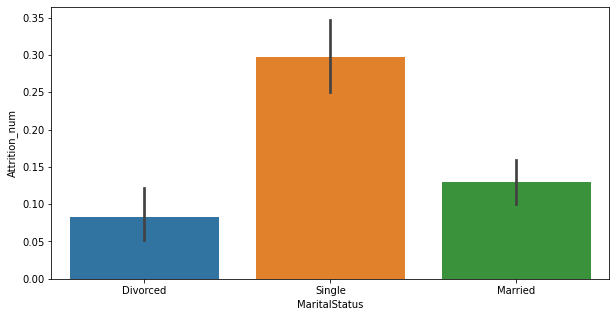

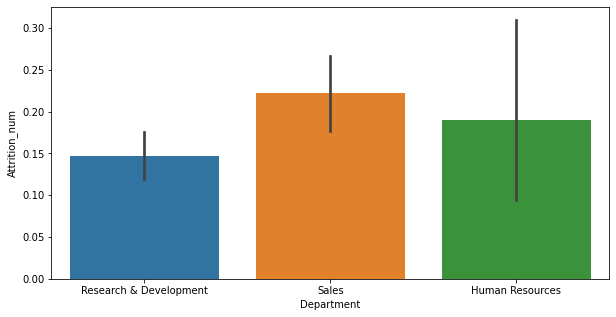

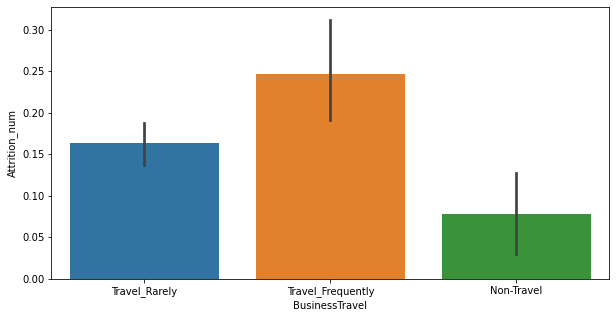

In [27]:
for i in feat:
    plt.figure(figsize=(10,5))
    sns.barplot(x=i,y='Attrition_num',data=employeeDF)

### Insights:

#### Overtime:
- Over 30% of the employees who work overtime, results in attrition.

#### Marital status:
- We can see here, that singles are having highest attrition rate.

#### Dapartment:
- In all, R&D is leading the attrition count of around 10%, but if we talk about attrition rate, then Sales is the leader.

#### Business travel:
- In this aspect, who rarely travel are having the maximum attrition count, but if we talk about attrition rate, then the top position is hel by people who travel frequently.

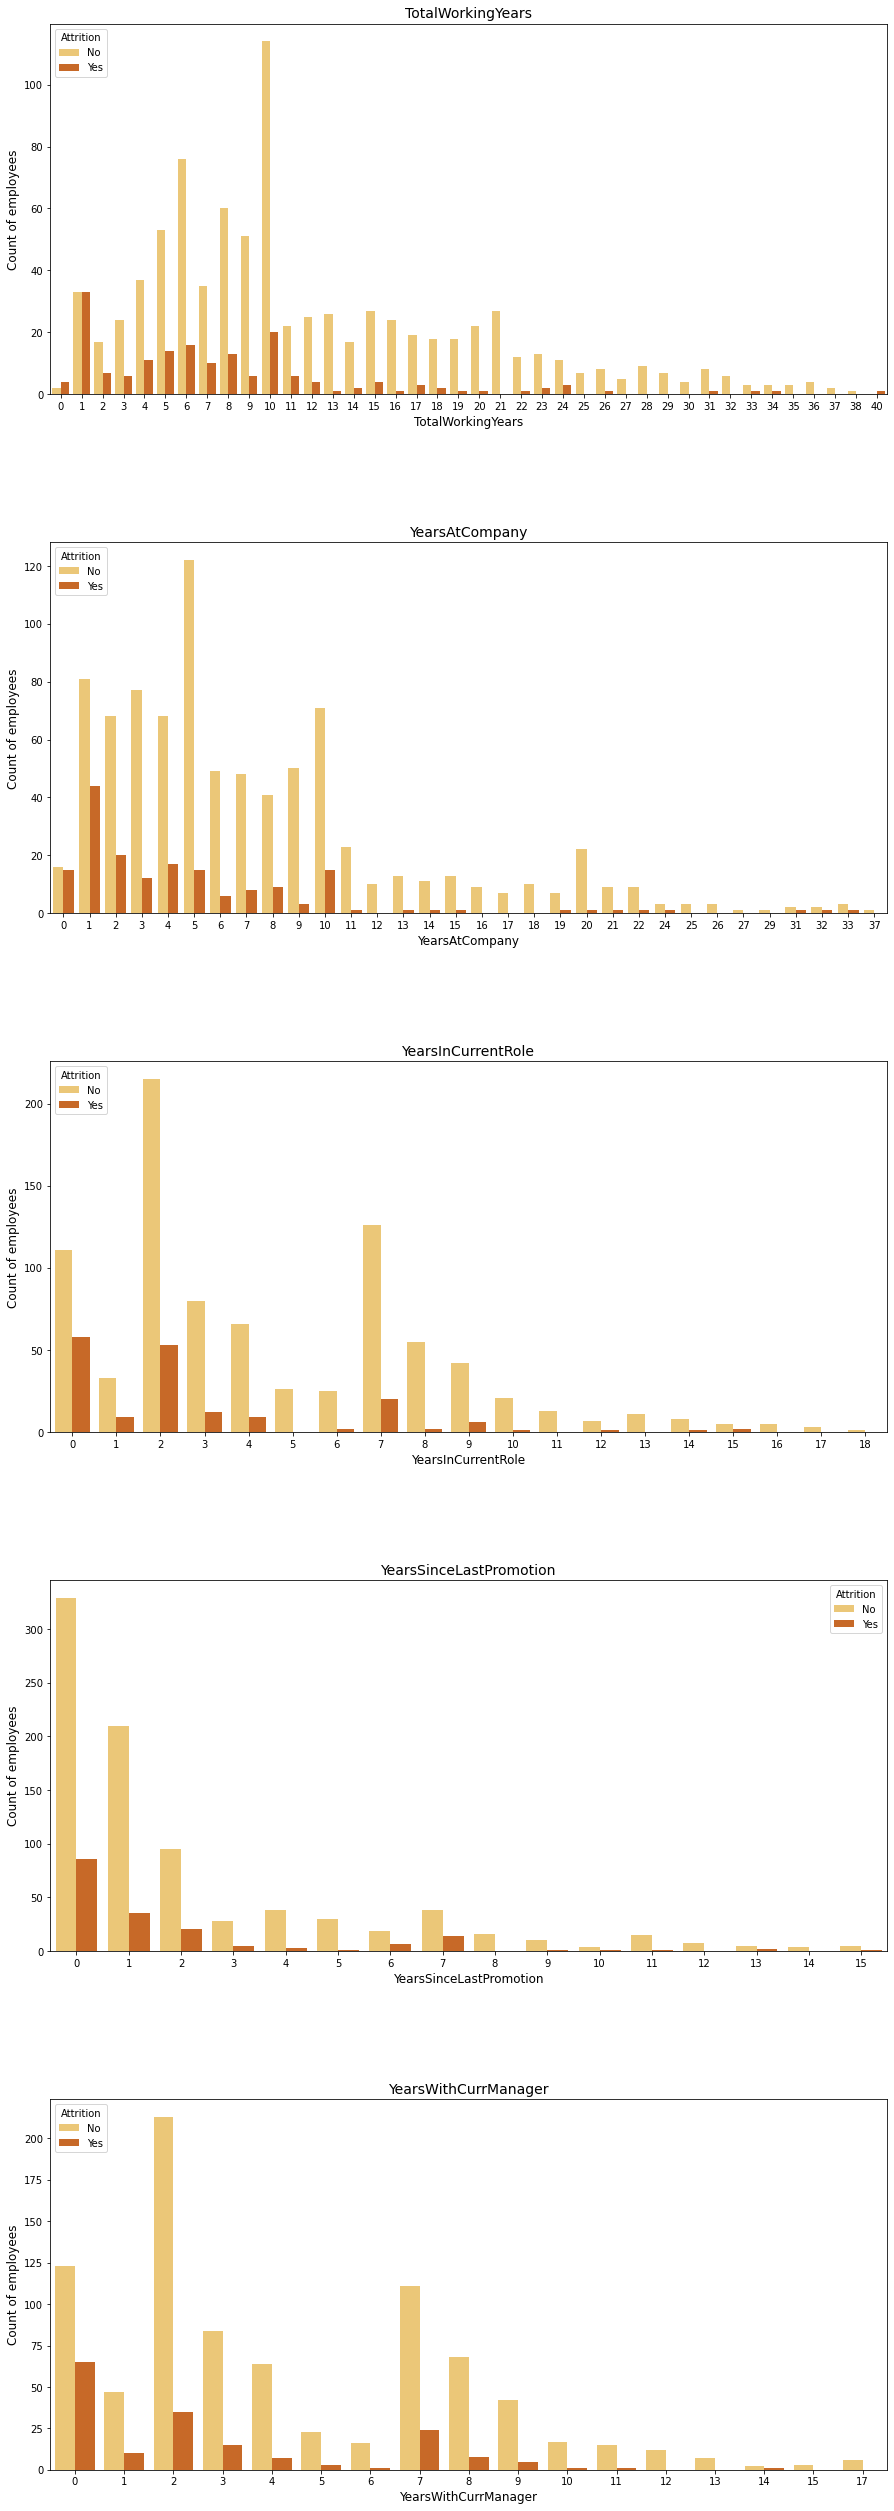

In [28]:
years = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
plt.figure(figsize=(15,45))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i,j in enumerate(years):
    plt.subplot(5,1,i+1)
    chart = sns.countplot(data= employeeDF[years+['Attrition']],x=j,hue='Attrition',palette='YlOrBr')
    chart.axes.set_title(j,fontsize=14)
    chart.set_xlabel(j,fontsize=12)
    chart.set_ylabel("Count of employees",fontsize=12)
    chart.tick_params(labelsize=10)

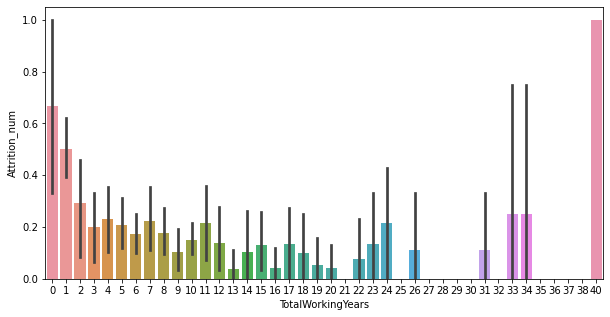

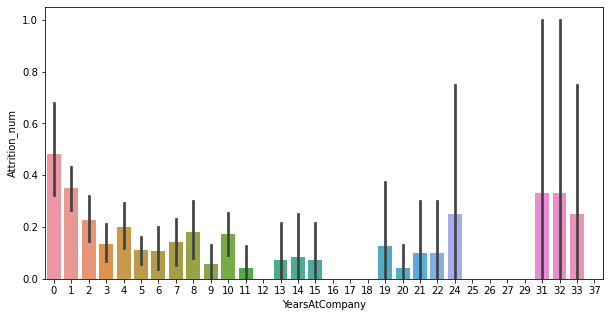

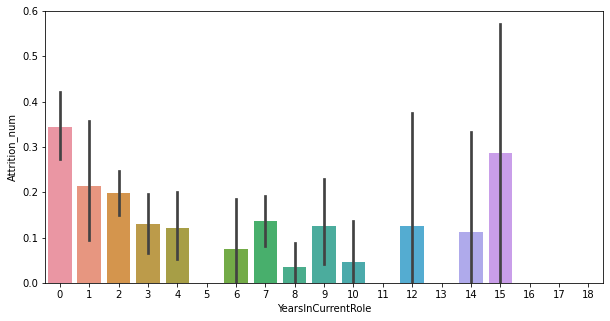

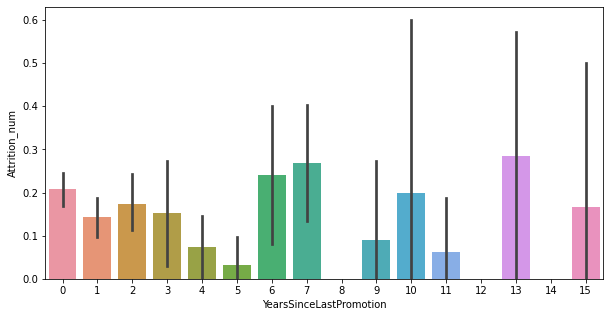

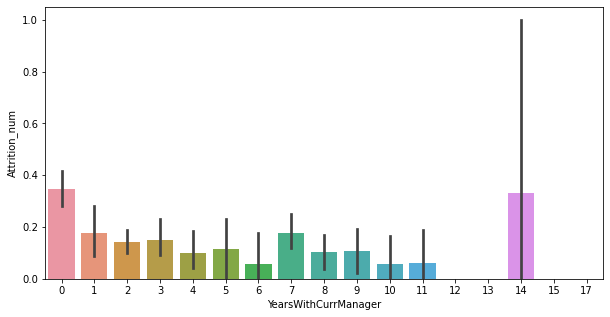

In [29]:
for i in years:
    plt.figure(figsize=(10,5))
    sns.barplot(x=i,y='Attrition_num',data=employeeDF)

### Insights:

#### Total working years:
- Highest attrition count can be seen in the employees who are having just 1 year of expirience(maybe fresher), here the count of attrited and non-attrited employees is same nearabout.

#### years at company:
- Here also highest attrition count is seen in the employees who have completed 1 year at the company.

#### Years since last promotion:
- Here it can be observed that employees leave the company within a year the get promotion.

In [37]:
employeeDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1029.0,37.930571,8.752415,18.0,32.0,37.930571,43.0,60.0
DailyRate,1029.0,800.528942,402.714749,102.0,466.0,800.528942,1153.0,1496.0
DistanceFromHome,1029.0,9.105928,8.429812,1.0,2.0,7.000000,14.0,29.0
HourlyRate,1029.0,66.680272,20.474094,30.0,48.0,67.000000,84.0,100.0
JobLevel,1029.0,2.043732,1.118918,1.0,1.0,2.000000,3.0,5.0
MonthlyIncome,1029.0,6449.796890,4794.525367,1009.0,2814.0,4735.000000,8446.0,19999.0
MonthlyRate,1029.0,14250.629738,7088.757938,2094.0,7950.0,14295.000000,20392.0,26999.0
NumCompaniesWorked,1029.0,2.653061,2.508186,0.0,1.0,1.000000,4.0,9.0
PercentSalaryHike,1029.0,15.260447,3.665779,11.0,12.0,14.000000,18.0,25.0
TotalWorkingYears,1029.0,11.196307,7.857581,0.0,6.0,10.000000,15.0,40.0


In [38]:
bins = [0,30,40,50,61]
ranges = ['Below 30Y','30Y-40Y','40Y-50Y','Above 50Y']

employeeDF['Age'] = pd.cut(employeeDF['Age'],bins,labels=ranges)

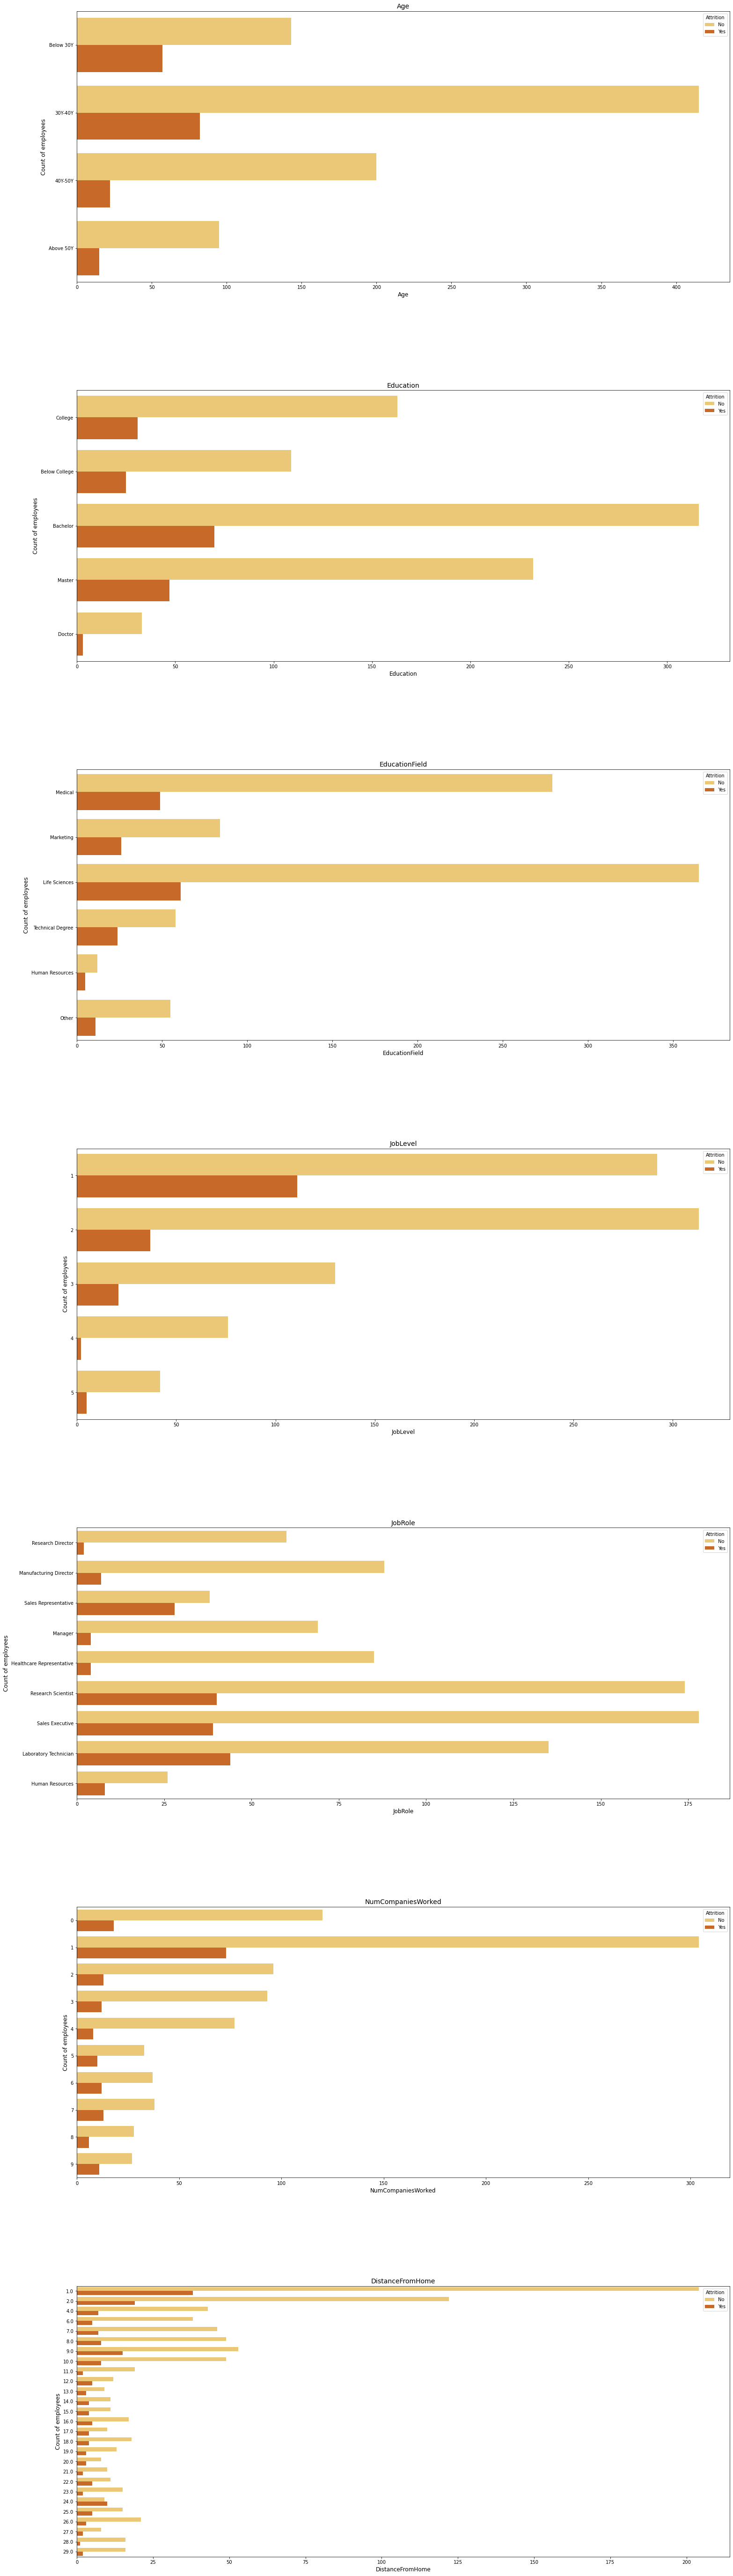

In [39]:
info = ['Age','Education','EducationField','JobLevel','JobRole','NumCompaniesWorked','DistanceFromHome']
plt.figure(figsize=(25,100))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i,j in enumerate(info):
    plt.subplot(7,1,i+1)
    chart = sns.countplot(data= employeeDF[info+['Attrition']],y=j,hue='Attrition',palette='YlOrBr')
    chart.axes.set_title(j,fontsize=14)
    chart.set_xlabel(j,fontsize=12)
    chart.set_ylabel("Count of employees",fontsize=12)
    chart.tick_params(labelsize=10)

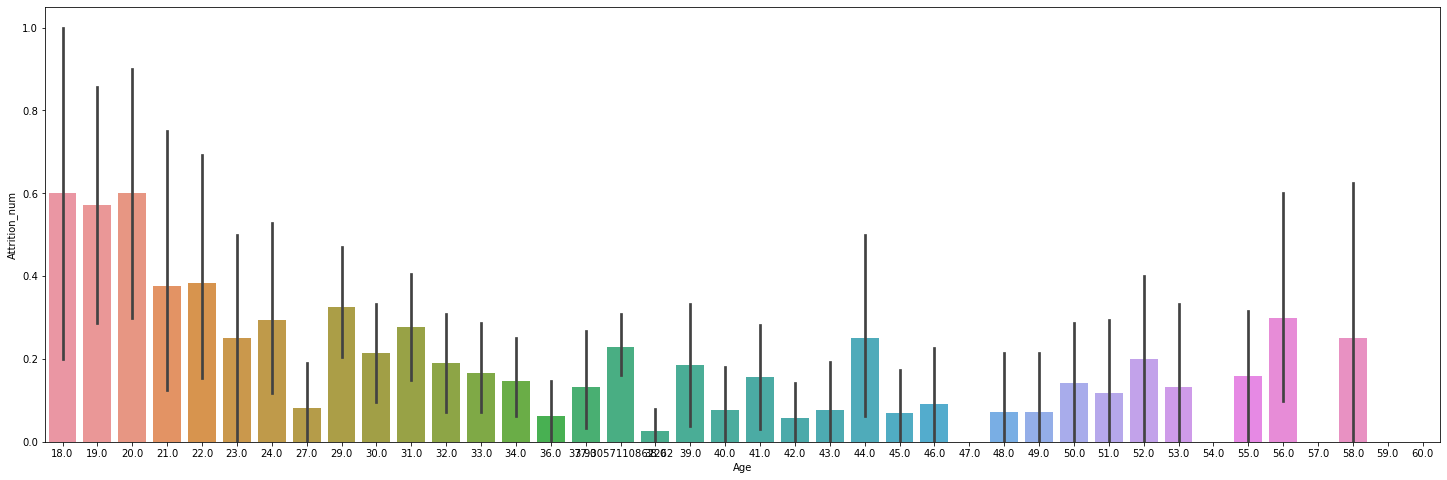

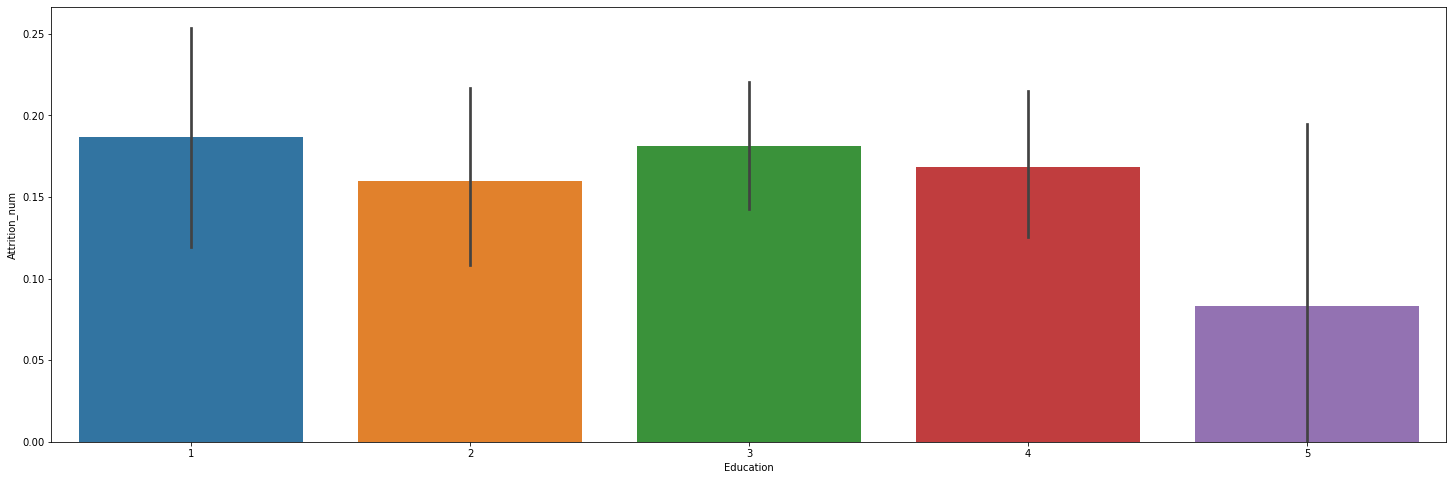

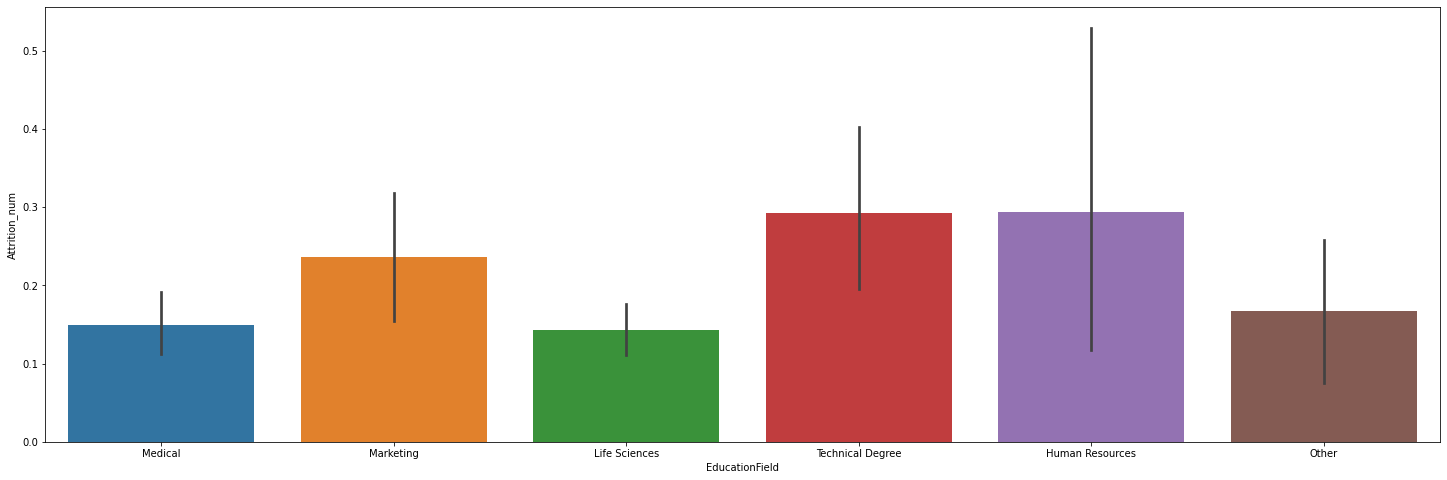

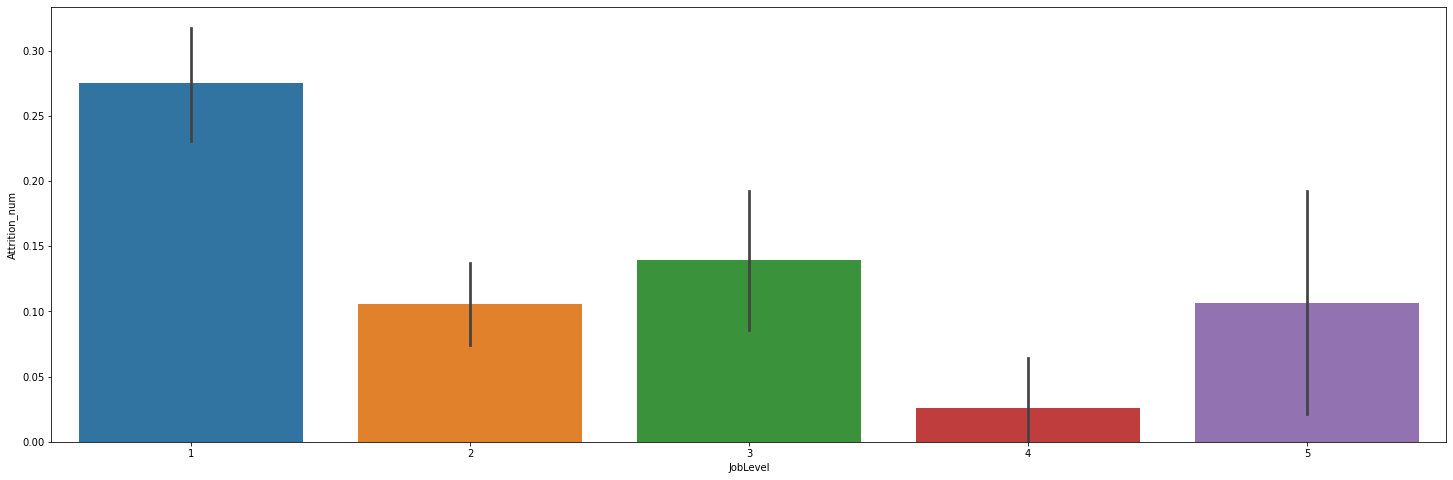

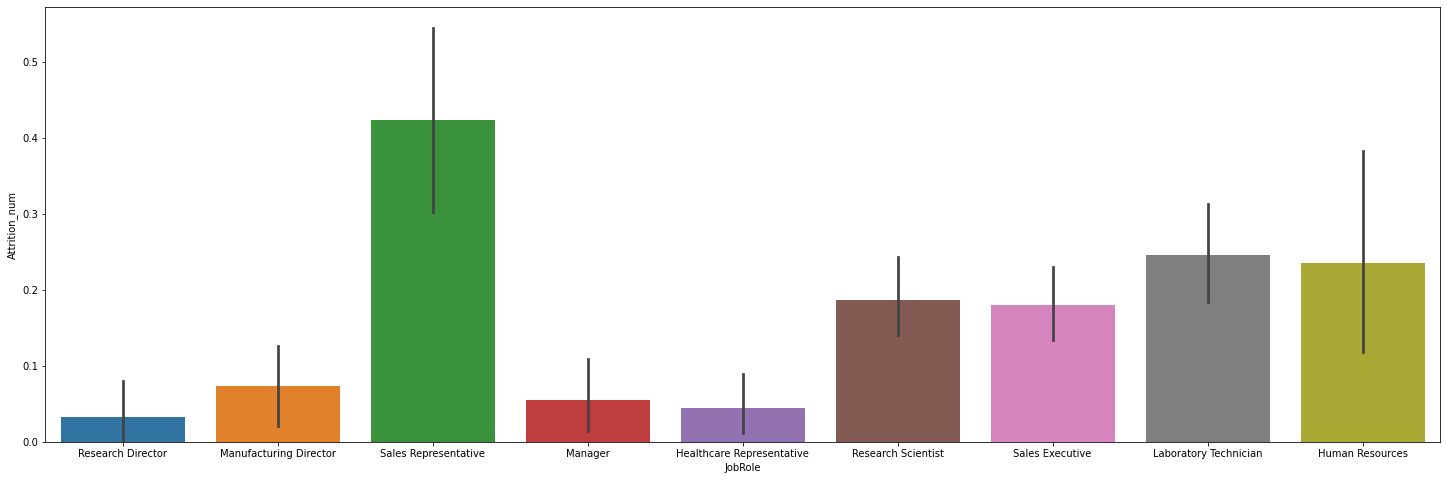

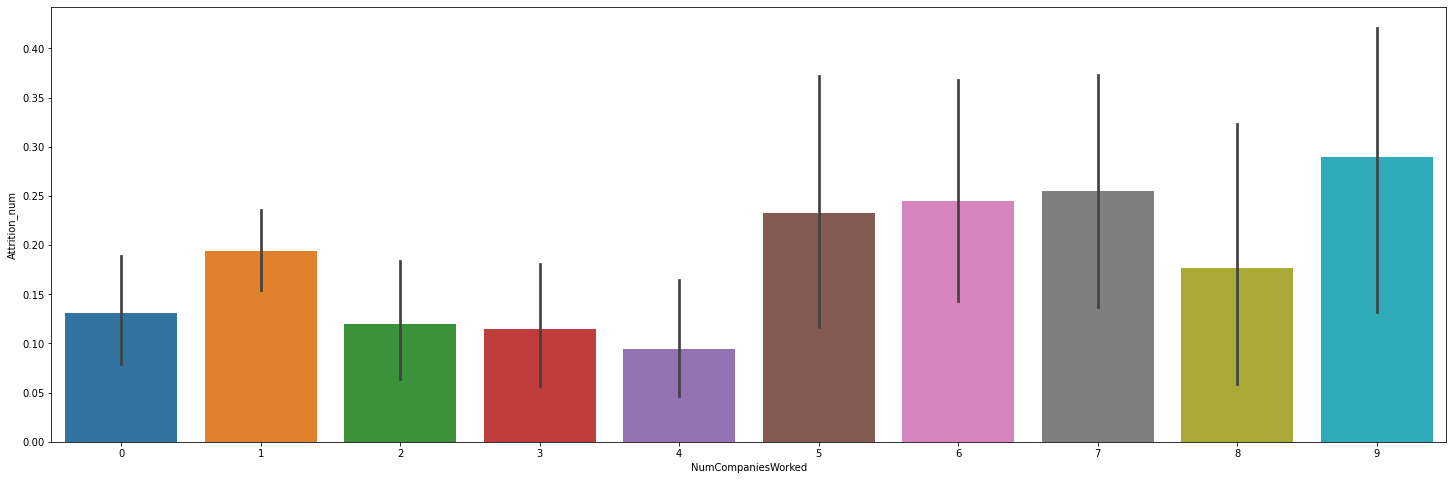

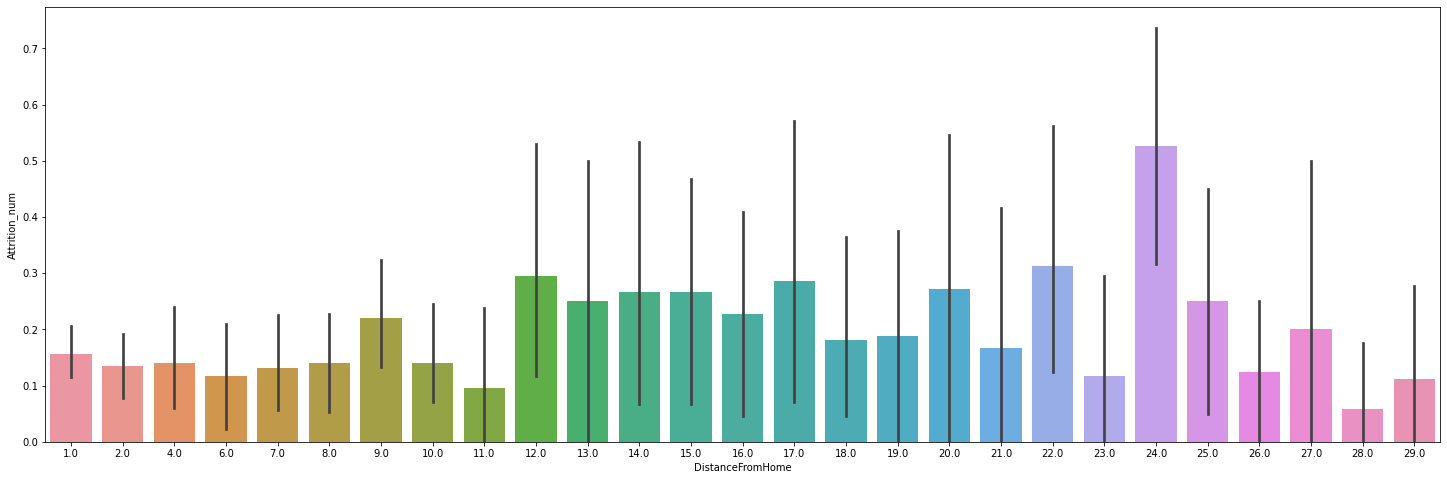

In [31]:
for i in info:
    plt.figure(figsize=(25,8))
    sns.barplot(x=i,y='Attrition_num',data=employeeDF)

In [32]:
employeeDF.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_num'],
      dtype='object')

In [33]:
employeeDF['Education'] : employeeDF['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master',
                                                           5:'Doctor'},inplace=True)
    
employeeDF['EnvironmentSatisfaction'] : employeeDF['EnvironmentSatisfaction'].replace({1:'Low',2:'Medium',
                                                                                    3:'High',4:'Very High'},inplace=True)
    
employeeDF['JobInvolvement'] : employeeDF['JobInvolvement'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},
                                                                    inplace=True)
    
employeeDF['JobRole'] : employeeDF['JobRole'].replace({1:'HR REP',2:'HR',3:'LAB TECHNICIAN',4:'MANAGER',
                                                             5:'MANAGING DIRECTOR',6:'RESEARCH DIRECTOR',
                                                             7:'RESEARCH SCIENTIST',8:'SALES EXECUTIVE',
                                                             9: 'SALES REPRESENTATIVE'},inplace=True)
    
employeeDF['JobSatisfaction'] : employeeDF['JobSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},
                                                                      inplace=True)
    
employeeDF['RelationshipSatisfaction'] : employeeDF['RelationshipSatisfaction'].replace({1:'Low',2:'Medium',3:'High',
                                                                                         4:'Very High'},inplace=True)
    
employeeDF['PerformanceRating'] : employeeDF['PerformanceRating'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},
                                                                          inplace=True)
    
employeeDF['WorkLifeBalance'] : employeeDF['WorkLifeBalance'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},
                                                                      inplace=True)

In [34]:
pd.set_option('display.max_columns',50)
employeeDF.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,College,Medical,Very High,Male,66,High,4,Research Director,Very High,Divorced,17399,6615,9,No,22,Very High,High,32,1,Medium,5,4,1,3,False
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,College,Medical,Medium,Male,84,High,2,Manufacturing Director,Medium,Divorced,4941,2819,6,No,20,Very High,Very High,7,0,High,3,2,0,1,False
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,Below College,Marketing,Medium,Male,31,High,1,Sales Representative,Medium,Single,2679,4567,1,No,13,High,Medium,1,3,High,1,0,1,0,True
3,50.0,No,Travel_Frequently,1246.0,Human Resources,1.0,Bachelor,Medical,Low,Male,99,High,5,Manager,Medium,Married,18200,7999,1,No,11,High,High,32,2,High,32,5,10,7,False
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,Master,Life Sciences,Medium,Male,87,High,3,Healthcare Representative,Medium,Single,10445,15322,7,No,19,High,Very High,18,4,High,8,6,4,0,False


In [40]:
employeeDF.to_excel('D:\Board Infinity\Projects\Final Projects BI\Employee Resignations\Final_employee_data.xlsx',index=False)